# Compare the Energy Resolution Between the Full DNN and Split DNN

In [1]:
import numpy as np
import time, datetime
import re
import matplotlib.pyplot as plt
import pandas as pd
import random, math
from array import array
from scipy import stats

### Read in the .npy files containing the energy resolution arrays
The files should be formatted such that there are three columns:
- Column 1: $1/\sqrt{E_T}$ (independent variable)
- Column 2: Raw Resolution
- Column 3: Predicted Resolution

In [17]:
# include the filenames being compared here
files = [
    'Final Results/CNN Resolution 07-15 (14).npy',
    'Final Results/DNN Resolution 07-14 (7).npy'
]

files2 = [
    'Final Results/CNN Ratio 07-15 (14).npy',
    'Final Results/DNN Ratio 07-14 (7).npy'
]

raw_path = "Final Results/raw_mean_ratios.npy"

Load the array(s) and confirm the number of data points of each file:

In [18]:
# declare the array that will contain the data
data = {}
ratio = {}

# declare the array that will hold the raw and predicted parameters
params_raw = {}
params_pred = {}

# make a linear fitting function
def linfit(x,m,b):
    return m*x + b

In [19]:
for filename in files:
    data[filename] = np.load(filename)
    shape = np.shape(data[filename])
    print('{} has shape: {}'.format(filename,shape))
    
raw = np.load(raw_path)

Final Results/CNN Resolution 07-15 (14).npy has shape: (4, 15)
Final Results/DNN Resolution 07-14 (7).npy has shape: (4, 15)


In [20]:
for filename in files2:
    ratio[filename] = np.load(filename)
    shape = np.shape(ratio[filename])
    print('{} has shape: {}'.format(filename,shape))

Final Results/CNN Ratio 07-15 (14).npy has shape: (2, 15)
Final Results/DNN Ratio 07-14 (7).npy has shape: (2, 15)


Remove the edge resolutions from the fit

In [21]:
SHADE = np.array([
        [0, 204, 204], 
        [255, 0, 0],
        [102, 255, 102],
        [255, 128, 0],
        [102, 0, 204],
        [255, 51, 255],
        [229.0, 196.0, 148.0]
]) / 256.0

SHAPE = np.array([
    "o",
    "s",
    "*",
    "^",
    "D",
    "H"])

### Evaluate the linear fits

Sort the datasets

In [22]:
data_sort = {}
ratio_sort = {}
for filename in data:
    data_sort[filename] = [
        sorted(data[filename][0]),
        [x for _, x in sorted(zip(data[filename][0],data[filename][1]))],
        sorted(data[filename][2]),
        [x for _, x in sorted(zip(data[filename][2],data[filename][3]))]
    ]
    
for filename in ratio:
    ratio_sort[filename] = [
        sorted(ratio[filename][0]),
        [x for _, x in sorted(zip(ratio[filename][0],ratio[filename][1]))],
    ]

Trim the datasets to avoid edge effects

In [45]:
data_trim = {}
ratio_trim = {}
for filename in data_sort:
    data_trim[filename] = [
        data_sort[filename][0],
        data_sort[filename][1],
        data_sort[filename][2][1:-4],
        data_sort[filename][3][1:-4]
    ]

for filename in ratio_sort:
    ratio_trim[filename] = [
        ratio_sort[filename][0][3:-1],
        ratio_sort[filename][1][3:-1]
    ]

Apply linear regression

In [46]:
for filename in files:
    print('======= '+filename+' ========')
    params_raw[filename] = stats.linregress(data_trim[filename][0],
                                           data_trim[filename][1])
    params_pred[filename] = stats.linregress(data_trim[filename][2],
                                            data_trim[filename][3])
    print('Raw Data: '+str(params_raw[filename][0])
          +', '+str(params_raw[filename][1]))
    print('Pred Data: '+str(params_pred[filename][0])
          +', '+str(params_pred[filename][1]))
    

======= Final Results/CNN Resolution 07-15 (14).npy ========
Raw Data: 1.1560259987111758, 0.009006497584370221
Pred Data: 0.5580635369749463, 0.06227493162827846
======= Final Results/DNN Resolution 07-14 (7).npy ========
Raw Data: 1.1408617965848649, 0.016128702505407544
Pred Data: 0.6480745249387171, 0.06599789601071268


### Plot the data points and the fits

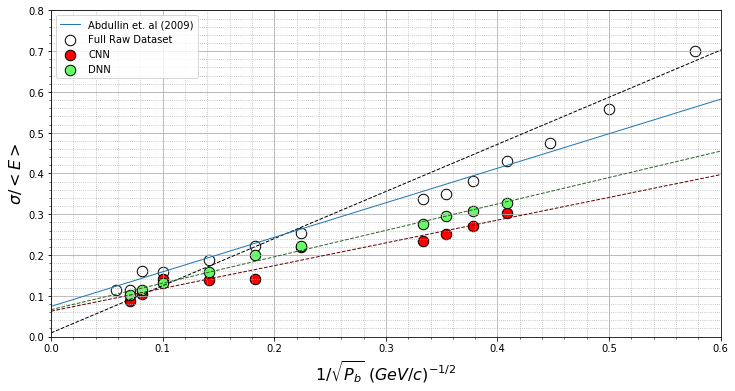

In [47]:
from numpy.random import uniform

plt.close()
plt.figure(figsize=(12,6))

linfit_range = np.linspace(0,0.8,100)

# plot a single set of the raw values using the first dataset
# preferrably for the full set
plt.scatter(data[files[0]][0], data[files[0]][1],
            marker = 'o',
            s = 110,
            label = 'Full Raw Dataset',
            facecolor = 'w', edgecolor = 'k')
y_raw = linfit(linfit_range,
               params_raw[files[0]][0], params_raw[files[0]][1])
y_std = params_raw[files[0]][1]

plt.plot(linfit_range, y_raw,
            linestyle = '--', color = 'black',
        linewidth = 1)

y_abd = linfit(linfit_range, 0.847, 0.074) # from Abdullin et al 2009
plt.plot(linfit_range, y_abd,
         linestyle = '-',
         linewidth = 1,
         label = 'Abdullin et. al (2009)')

COUNT = 1

for filename in files:
    # shade = uniform(0,1,3)
    y_pred = linfit(linfit_range,
                   params_pred[filename][0], params_pred[filename][1])
    y_pred_std = params_pred[filename][1]
    plt.scatter(data_trim[filename][2], data_trim[filename][3],
            color = SHADE[COUNT],
            alpha = 1,
            s = 110,
            edgecolor = 'k',
            label = filename[14:17]
            )
    plt.plot(linfit_range, y_pred,
            linestyle = '--', linewidth = 1,
            color = SHADE[COUNT]*0.4)

    COUNT += 1
plt.xlabel(r'$1/\sqrt{P_{b}}\ (GeV/c)^{-1/2}$',
          fontsize = 16)
plt.xlim(0,0.6)
plt.ylabel(r'$\sigma/<E>$',
          fontsize = 16)
plt.ylim(0,0.8)
plt.minorticks_on()
plt.grid(b = True, which = 'major')
plt.grid(b = True, which = 'minor', linestyle = ':')
plt.legend(loc = 'best')
plt.show()

In [48]:
abdullin_y = np.array([
    1.005,
    1.010,
    0.995,
    0.960,
    0.993,
    1.002,
    1.013,
    1.001,
    0.995,
    0.985,
    0.986,
    1.005
])

abdullin_x = np.array([
    5,
    6,
    7,
    8,
    9,
    20,
    30,
    50,
    100,
    150,
    200,
    300
])

Abdullin et al (2009): 0.995833333333,0.0136493793103
Final Results/CNN Ratio 07-15 (14).npy: 0.946132246887,0.0265176414052
Final Results/DNN Ratio 07-14 (7).npy: 0.974218732943,0.0267428682041


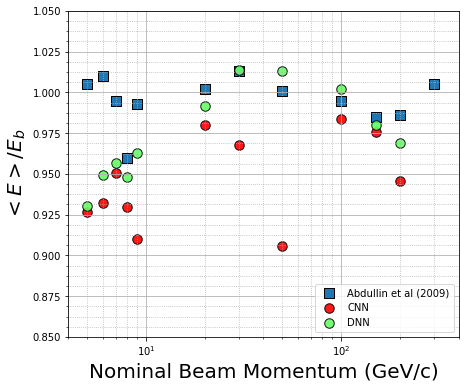

In [55]:
plt.close()
plt.figure(figsize = (7,6))

plt.scatter(abdullin_x, abdullin_y,
           label = 'Abdullin et al (2009)',
           s = 90,
           edgecolor = 'k', marker = 's',
           )

print('Abdullin et al (2009): {},{}'.format(np.mean(abdullin_y),
                                           np.std(abdullin_y)))

'''
plt.scatter(raw[0][3:], raw[1][3:],
           label = 'Raw',
           s = 75,
           marker = 'x',
           color = 'k'
           )
'''
COUNT = 1

for filename in files2:
    plt.scatter(ratio_trim[filename][0],ratio_trim[filename][1],
               label = filename[14:17],
               s = 90, alpha = 0.9,
               edgecolor = 'k', color = SHADE[COUNT])

    print('{}: {},{}'.format(filename, np.mean(ratio_trim[filename][1]),
                        np.std(ratio_trim[filename][1])))
    
    COUNT += 1

plt.xlim(4,400)
plt.xlabel('Nominal Beam Momentum (GeV/c)',
          fontsize = 20)
plt.xscale('log')
plt.ylim(0.85,1.05)
plt.ylabel(r'$<E>/E_b$',
           fontsize = 20)
    
plt.legend(loc = 4)
plt.minorticks_on()
plt.grid(b = True, which = 'major')
plt.grid(b = True, which = 'minor', linestyle = ':')